# Predicción de Diabetes en Mujeres Pimas

## 1. Contexto Histórico

Las mujeres Pima son integrantes de la tribu Pima, un grupo indígena que vive principalmente en el suroeste de los Estados Unidos, especialmente en el estado de Arizona, y en el norte de México, en el estado de Sonora. Los Pima tienen una herencia y estilo de vida muy específicos que se han estudiado en investigaciones médicas y antropológicas debido a su alta incidencia de diabete tipo 2. Este rasgo ha despertado gran interés en la comunindad científica, ya que losestudios sugieren que tanto factores genéticos como ambientales contribuyen a la prevalencia de esta enfermedad en esta población.

## 2. Introducción

En este proyecto, utilizaremos el conjunto de datos Pima Indians Diabetes. Este conjunto de datos fue recopilado por el Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales (NIDDK) de EE.UU., y contiene información clínica y de estilo de vida de mujeres Pima mayores de 21 años, como la edad, el índice de masa corporal, los niveles de glucosa en sangre y la presión arterial, entre otros factores.

Se usará ese dataset, con la intención construir un modelo de red neuronal (un perceptrón simple) que prediga si una mujer tiene diabetes en función de ciertas características médicas. Estas características son:

- `num_embarazos`:  Número de veces que la mujer ha estado embarazada.
- `glucosa`: Concentración de glucosa en plasmaa 2 horas de una prueba de tolerancia a la glucosa.
- `presion_arterial`: Presión arterial diastólica (en mm Hg).
- `pliegue_cutaneo`: Grosor del pliege cutáneo del trícps (en mm).
-`insulina`: Concentración de insulina en plasma a 2 horas de una prueba de tolerancia a la glucosa (en mu U/ml).
- `indice_masa_corporal`: Índice de masa corporal, calculado a partir del peso y la altura (en kg/$m^2$)
- `pedigri_diabetes`: Un valor que indica la probabilidad de diabetes en función de la historia familiar.
- `edad`: Edad de la mujer (en años).
- `clase`:Variable objetivo que indica si la mujer tiene diabetes o no.

Para este propósito se realizará un análisis exploratorio de los datos, un procesamiento de los datos (de ser necesario) y por último, la construcción y evaluación de un modelo de red neuronal simple utilizando la librería Keras.

## 3. Carga de Librerías 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

## 4. Carga de los datos

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["num_embarazos", "glucosa", "presion_arterial", "pliegue_cutaneo", 
                "insulina", "indice_masa_corporal", "pedigri_diabetes", "edad", "clase"]
data = pd.read_csv(url, names=column_names)

# 5. Exploración de los Datos

Como podemos observar a continuación, el conjunto de datos con el que vamos a trabajar está compuesto únicamente por atributos numéricos. 

In [3]:
# Visualizar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
data.head()

Primeras filas del conjunto de datos:


,num_embarazos,glucosa,presion_arterial,pliegue_cutaneo,insulina,indice_masa_corporal,pedigri_diabetes,edad,clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


De estas variables numéricas, dos son tipo decimal, el resto son tipo entero.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_embarazos         768 non-null    int64  
 1   glucosa               768 non-null    int64  
 2   presion_arterial      768 non-null    int64  
 3   pliegue_cutaneo       768 non-null    int64  
 4   insulina              768 non-null    int64  
 5   indice_masa_corporal  768 non-null    float64
 6   pedigri_diabetes      768 non-null    float64
 7   edad                  768 non-null    int64  
 8   clase                 768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Del resumen estadístico sacamos que las se tratan de datos de mujeres de entre 21 y 81 años de edad. Además, podemos apreciar una irregularidad en los datos, pues la variable pedigri_diabetes toma valores entre 0 y 1, pero nos sale que su valor máximo llega al 2.42, lo que no puede ser posible. 

In [5]:
# Resumen de las estadísticas
print("\nResumen estadístico:")
data.describe()


Resumen estadístico:


,num_embarazos,glucosa,presion_arterial,pliegue_cutaneo,insulina,indice_masa_corporal,pedigri_diabetes,edad,clase
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Y al parecer no tenemos valores Null en el conjunto de datos.

In [6]:
# Comprobar si hay valores nulos
print("\nVerificando valores nulos:")
print(data.isnull().sum())


Verificando valores nulos:
num_embarazos           0
glucosa                 0
presion_arterial        0
pliegue_cutaneo         0
insulina                0
indice_masa_corporal    0
pedigri_diabetes        0
edad                    0
clase                   0
dtype: int64


Continuamos con la generación de gráficas que nos permitan identificar tendencias y posibles relaciones entre las variables del conjunto de datos

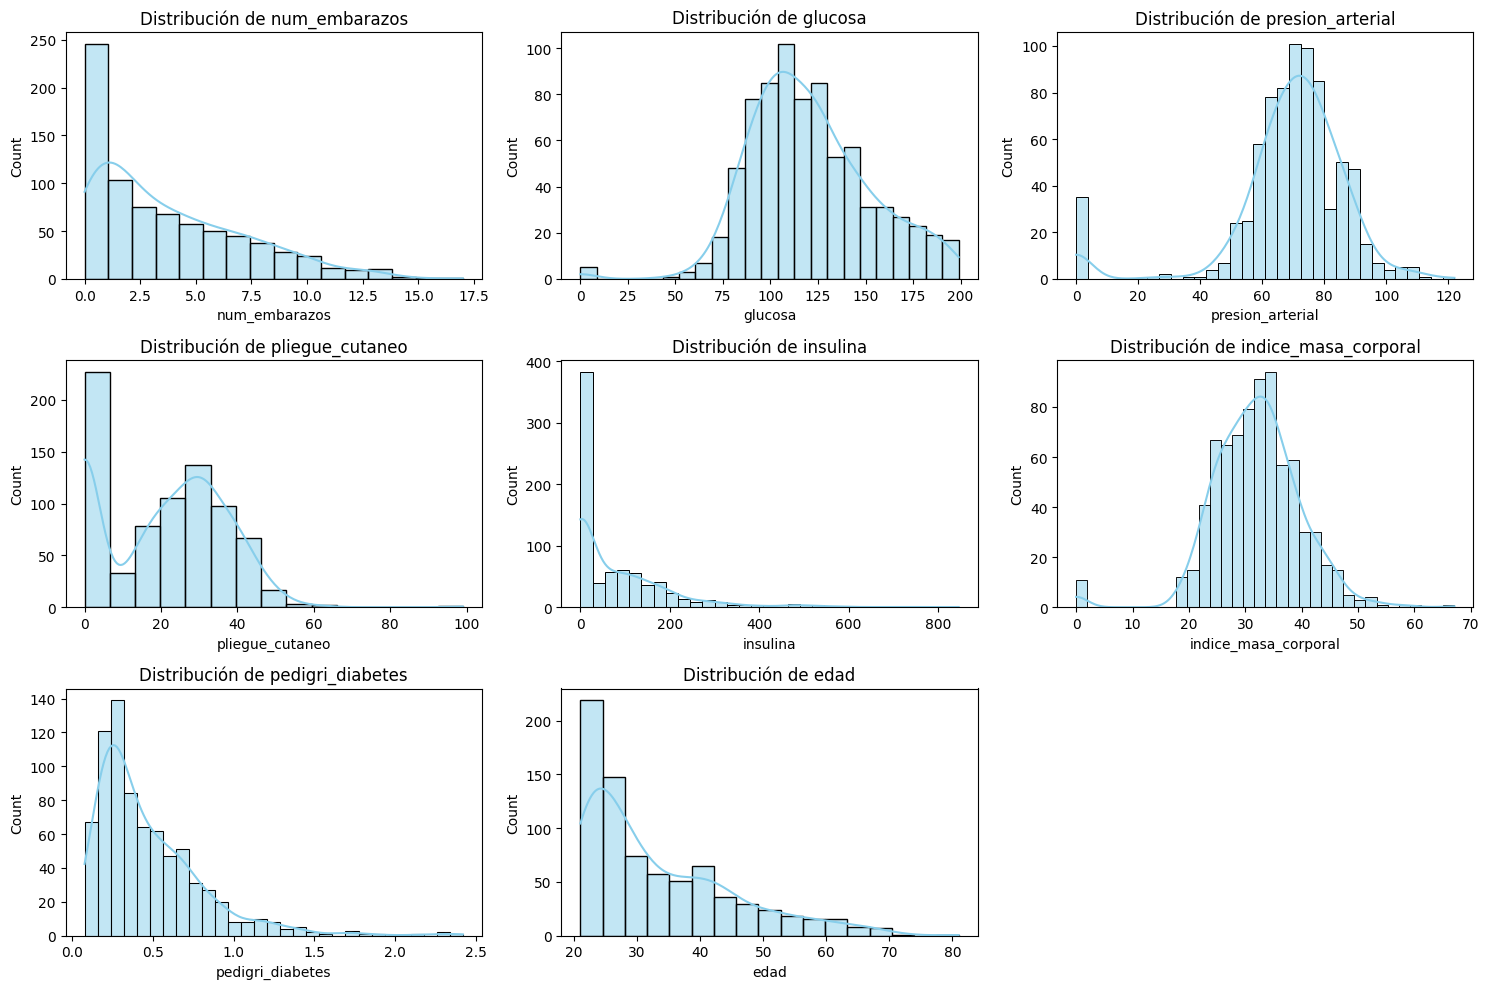

In [7]:
plt.figure(figsize=(15, 10))

# Graficar histogramas para cada variable numérica
for i, col in enumerate(column_names[:-1]):  # Excluye "clase"
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=data, x=col, kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

La mayoría de los datos se concentran en mujeres con cero embarazos, con una disminución progresiva a medida que aumenta el número de embarazos. Esto sugiere que muchas mujeres en el conjunto de datos tienen pocos o ningún embarazo.

En cuanto a la glucosa, su distribución es aproximadamente normal, aunque está desplazada hacia la derecha. Esto indica la presencia de algunos valores elevados en la muestra.

La presión arterial también presenta una distribución cercana a la normal, pero incluye valores bajos o incluso nulos, lo que podría deberse a datos faltantes o errores en la recopilación.

Respecto al pliegue cutáneo, hay una notable acumulación de valores cercanos a cero, lo cual podría reflejar datos faltantes. Entre los valores restantes, la distribución está ligeramente sesgada hacia la derecha.

La insulina muestra una gran concentración de valores bajos, seguida de una cola larga hacia valores altos, lo que sugiere la existencia de valores atípicos en algunos casos.

El índice de masa corporal (IMC) tiene una distribución aproximadamente normal, algo común en datos poblacionales.

Por su parte, el pedigrí de diabetes está sesgado hacia valores bajos, aunque algunos individuos presentan valores más altos.

Finalmente, la distribución de la edad está sesgada hacia edades jóvenes, con una disminución gradual en el número de individuos de mayor edad.

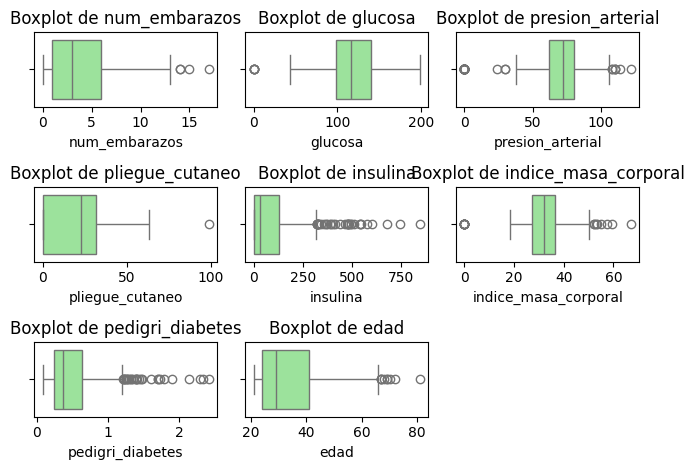

In [8]:
# Graficar boxplots para cada variable numérica
for i, col in enumerate(column_names[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x=col, color='lightgreen')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

Los diagramas de caja confirman la presencia de valores atípicos en varias variables, especialmente en insulina, glucosa, presión arterial y edad. Esto podría reflejar tanto variaciones naturales como posibles errores en la entrada de datos.

En particular, las variables como el pliegue cutáneo e insulina presentan numerosos valores atípicos en los rangos más altos. Esto sugiere que dichos valores son poco comunes dentro del rango central de la muestra y podrían necesitar un análisis más detallado para su tratamiento o verificación.

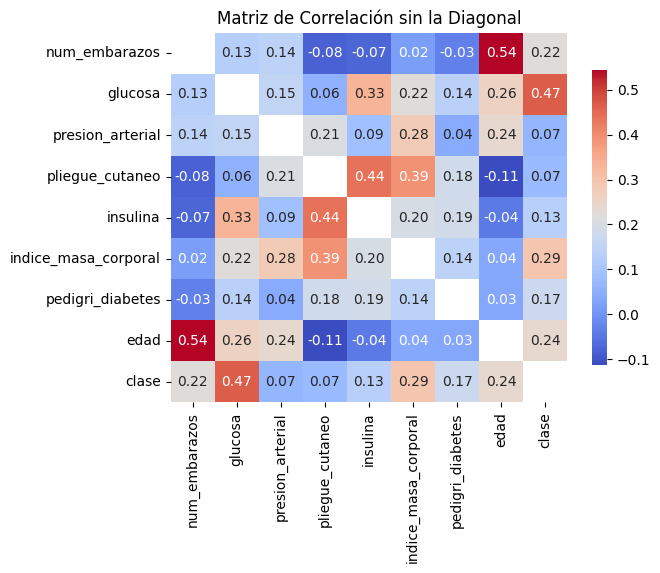

In [9]:
# Crear la matriz de correlación
corr_matrix = data.corr()

# Reemplazar los valores de la diagonal con NaN para que no se muestren en el gráfico
np.fill_diagonal(corr_matrix.values, np.nan)

# Graficar la matriz de correlación sin una máscara
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación sin la Diagonal')
plt.show()

Las correlaciones en los datos revelan patrones significativos: el número de embarazos y la edad muestran una alta correlación positiva (0.54), lo que es esperable, ya que las mujeres mayores tienden a tener más embarazos. La glucosa y la clase presentan una correlación moderada positiva (0.47), indicando que niveles más altos de glucosa se asocian con mayor probabilidad de pertenecer a la clase relacionada con diabetes. De manera similar, el índice de masa corporal (IMC) y la clase tienen una correlación positiva (0.29), sugiriendo una relación entre un mayor IMC y un mayor riesgo de diabetes. Finalmente, el pliegue cutáneo y la insulina tienen una correlación moderada (0.44), lo que sugiere que un mayor grosor del pliegue cutáneo tiende a relacionarse con niveles más altos de insulina.


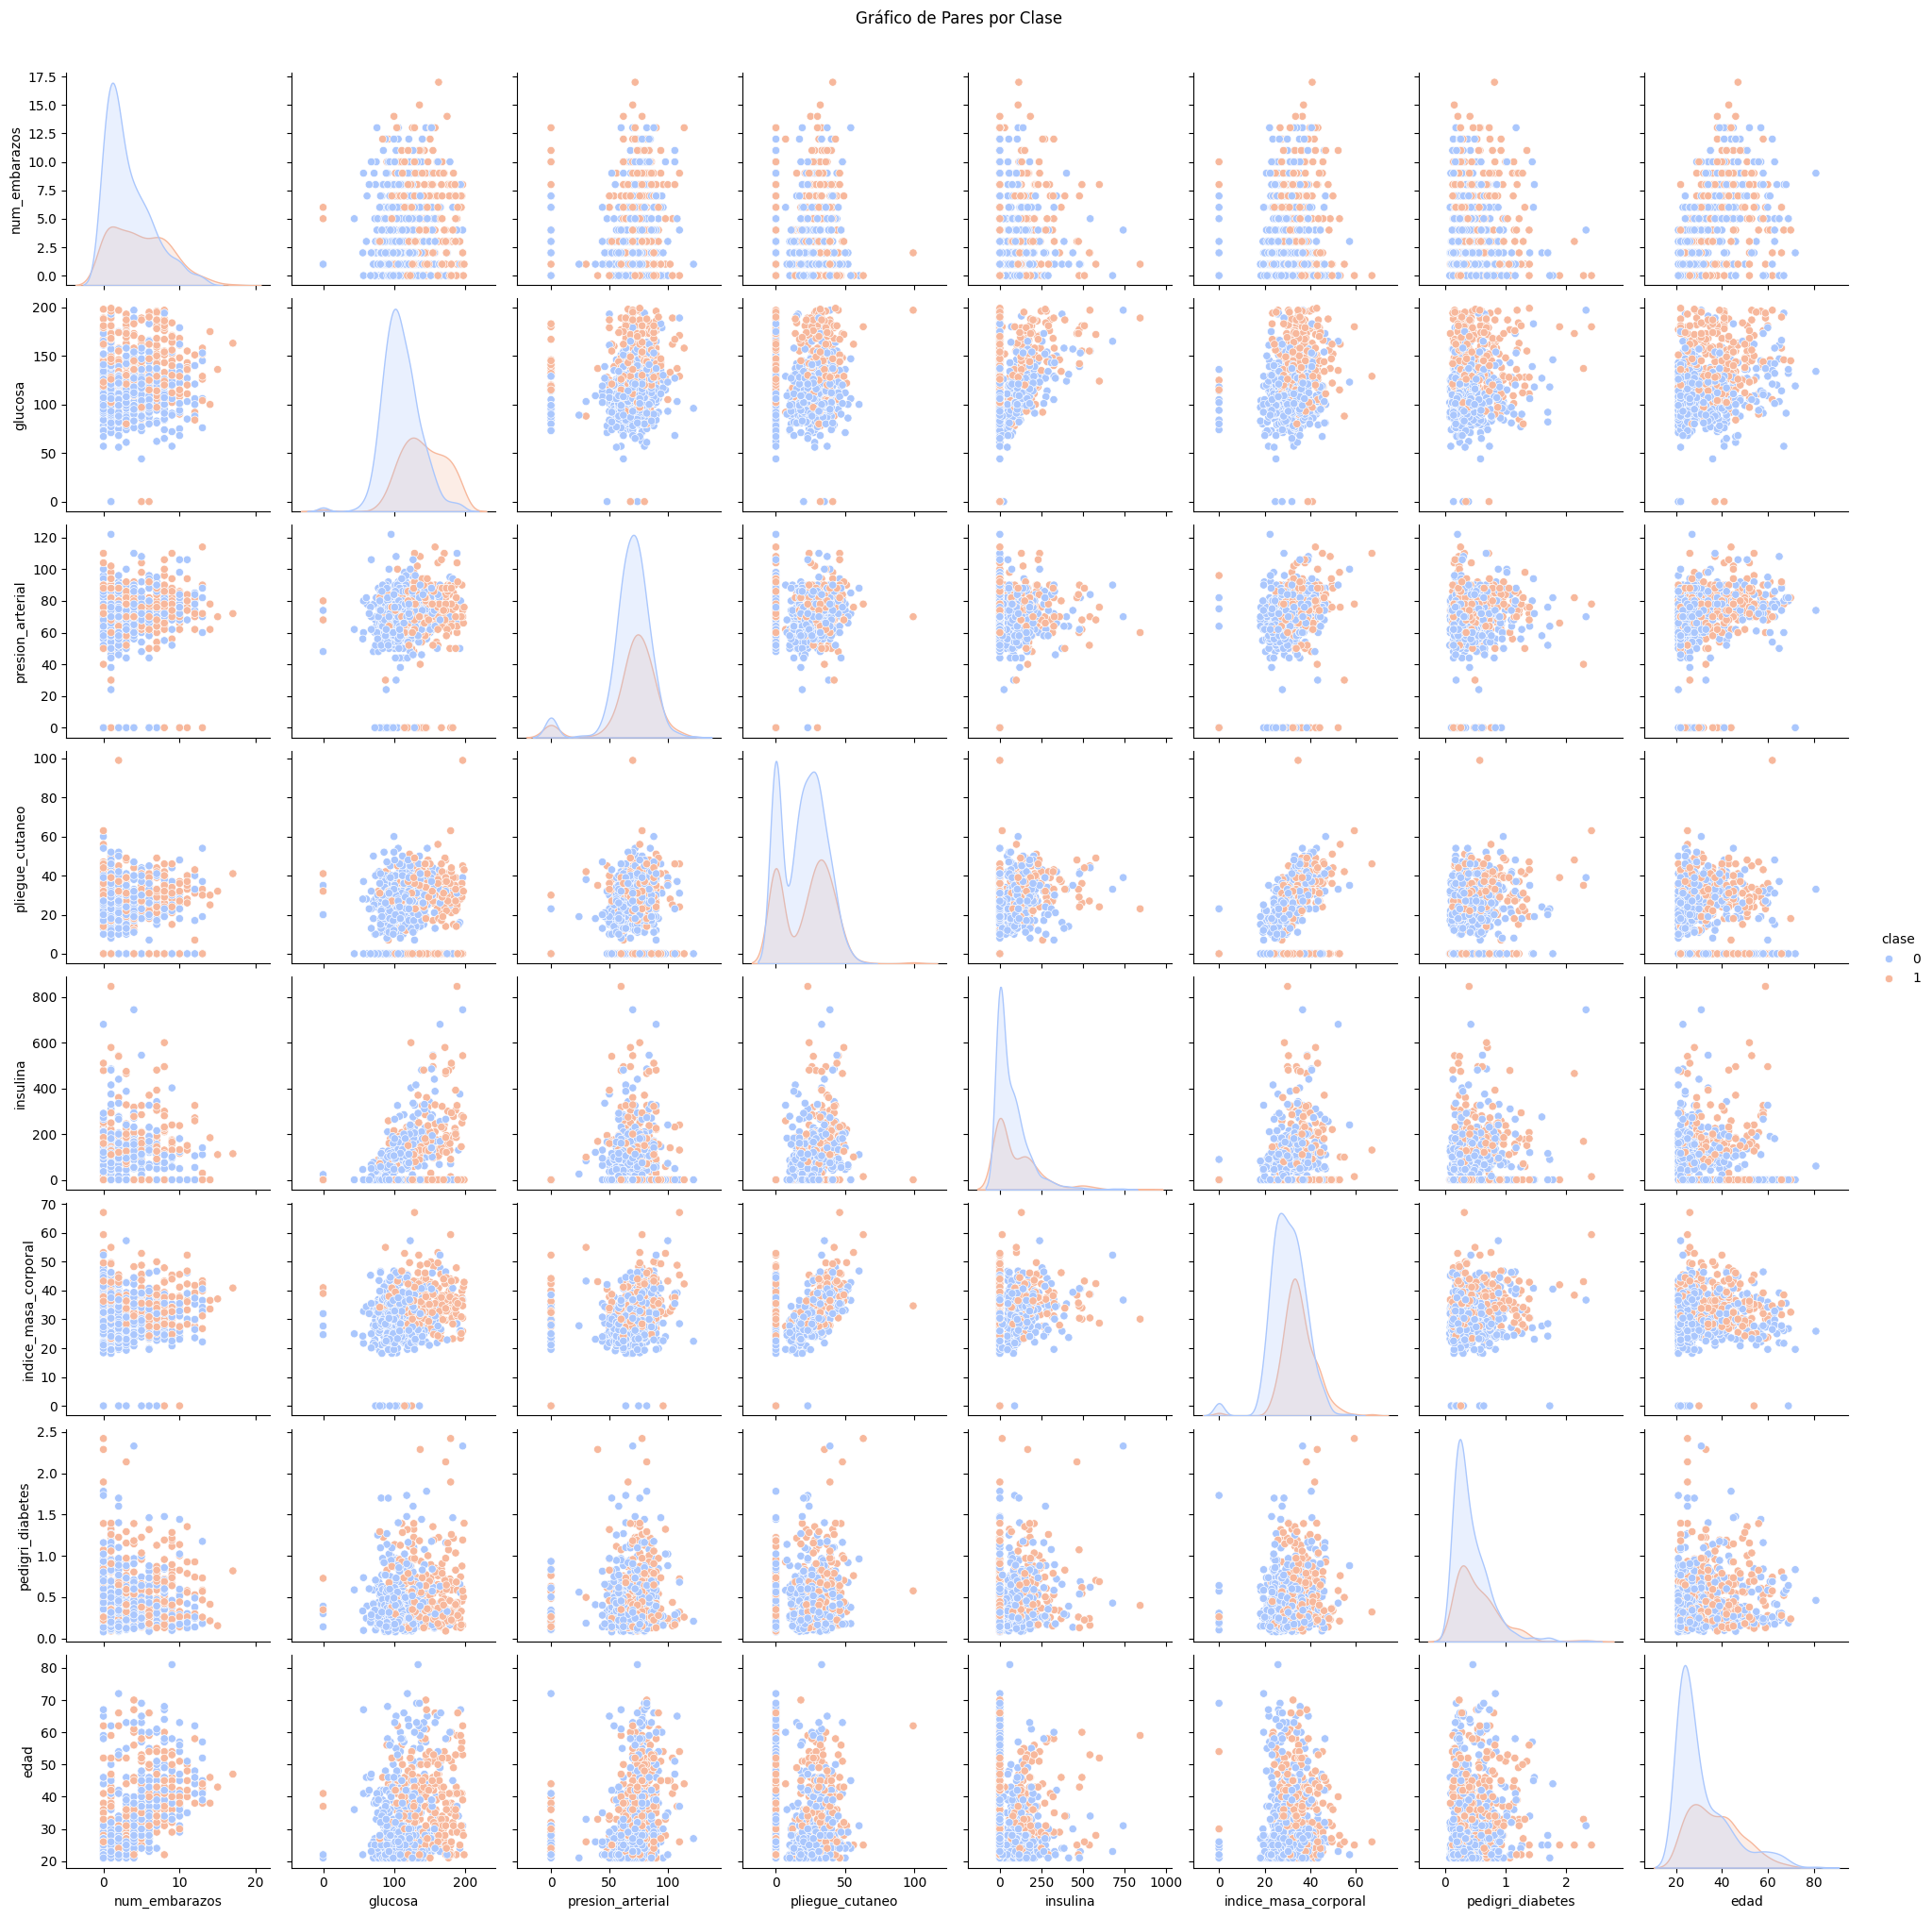

In [10]:
sns.pairplot(data, vars=column_names[:-1], hue="clase", palette="coolwarm", diag_kind="kde")
plt.suptitle("Gráfico de Pares por Clase", y=1.02)
plt.show()

En el conjunto de datos de diabetes de mujeres pimas, algunas variables destacan por su capacidad para diferenciar entre clases. Variables como glucosa, presión arterial, insulina y edad muestran que las mujeres con diabetes tienden a tener valores significativamente más altos en comparación con aquellas sin la enfermedad. Por otro lado, variables como el número de embarazos y el pedigrí de diabetes no presentan una separación tan marcada entre las clases, lo que podría indicar una menor influencia directa en la distinción entre los grupos.

C:\Users\esthe\AppData\Local\Temp\ipykernel_14232\2141182999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="clase", palette="viridis")


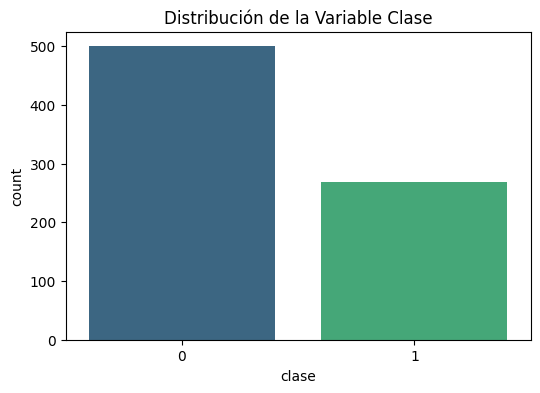

In [11]:
# Distribución de la clase
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="clase", palette="viridis")
plt.title("Distribución de la Variable Clase")
plt.show()

El conjunto de datos presenta un desequilibrio significativo entre las clases, con una mayor proporción de mujeres no diabéticas (clase = 0) en comparación con las diabéticas (clase = 1). Este sesgo hacia la clase no diabética es un aspecto crucial a tener en cuenta durante el análisis y el modelado, ya que podría influir en los resultados y en la capacidad del modelo para identificar correctamente a las mujeres con diabetes.

C:\Users\esthe\AppData\Local\Temp\ipykernel_14232\151873067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="clase", y=col, palette="muted")
C:\Users\esthe\AppData\Local\Temp\ipykernel_14232\151873067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="clase", y=col, palette="muted")
C:\Users\esthe\AppData\Local\Temp\ipykernel_14232\151873067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="clase", y=col, palette="muted")
C:\Users\esthe\AppData\Local\Temp\ipykernel_14232\151873067.py:6

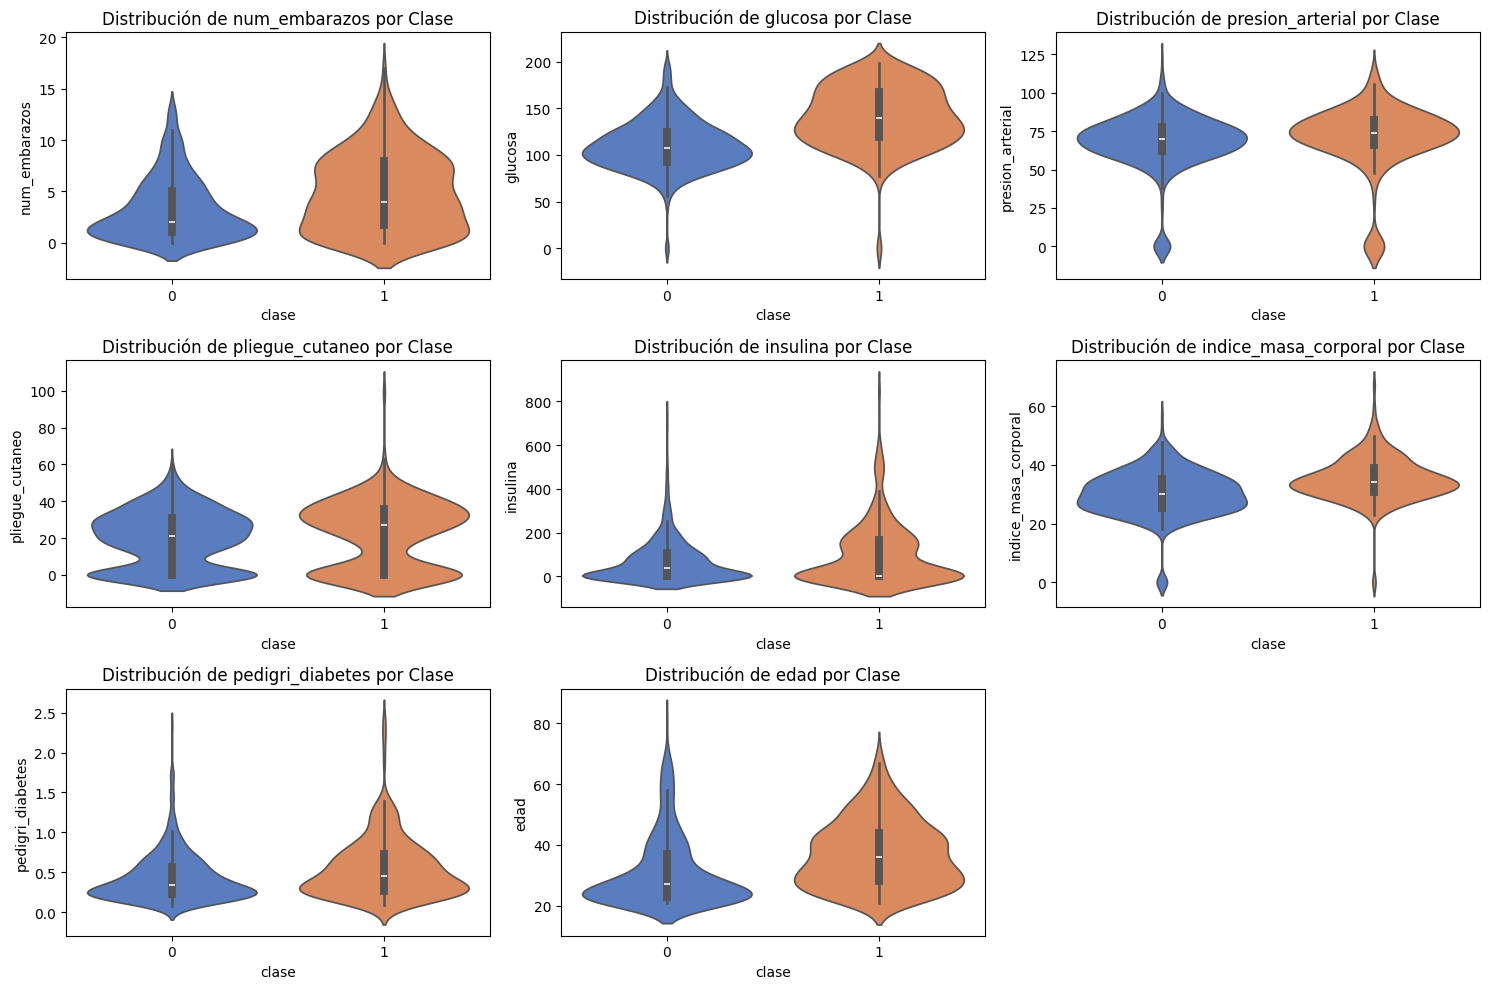

In [12]:
plt.figure(figsize=(15, 10))

# Graficar diagramas de violín para cada variable en función de la clase
for i, col in enumerate(column_names[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=data, x="clase", y=col, palette="muted")
    plt.title(f'Distribución de {col} por Clase')

plt.tight_layout()
plt.show()

El análisis de las variables muestra diferencias importantes entre las clases de mujeres diabéticas y no diabéticas. Variables como glucosa, insulina, índice de masa corporal (IMC), pedigrí de diabetes y edad presentan patrones claros: las mujeres diabéticas tienden a tener niveles significativamente más altos de glucosa e insulina, un IMC mayor, un valor más alto en el pedigrí de diabetes (indicando predisposición genética) y una edad promedio superior. También se observa que las mujeres diabéticas tienden a tener presiones arteriales más altas. Por otro lado, el número de embarazos y el grosor del pliegue cutáneo no muestran diferencias marcadas entre las clases, con distribuciones similares en ambos grupos. Estas observaciones resaltan las características más influyentes en la distinción entre mujeres con y sin diabetes dentro de este conjunto de datos.

# 6. Limpieza de los datos

A continuación nos centraremos en identificar y estudiar los valores anómalos. 

In [13]:
# Contar el número de entradas en la columna 'pedigri_diabetes' que son mayores a 1
num_anomalos = data[data['pedigri_diabetes'] > 1].shape[0]
print(num_anomalos)

51


In [14]:
(num_anomalos/data.shape[0])*100

6.640625

Por lo que podemos ver, de las 768 entradas, 51 tiene valores anómalos en l variable pedigri_diabetes, lo que implica que el 6,64% de los datos.

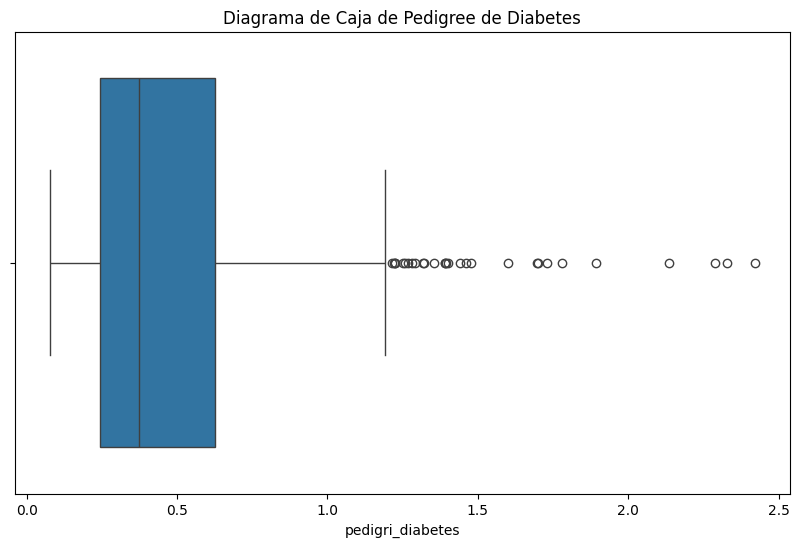

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['pedigri_diabetes'])
plt.title('Diagrama de Caja de Pedigree de Diabetes')
plt.show()

Vamos a imprimir las muestras donde pasa esto

In [16]:
# Mostrar los registros donde 'pedigri_diabetes' es mayor que 1
anomalos = data[data['pedigri_diabetes'] > 1]
display(anomalos)

,num_embarazos,glucosa,presion_arterial,pliegue_cutaneo,insulina,indice_masa_corporal,pedigri_diabetes,edad,clase
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
131,9,122,56,0,0,33.3,1.114,33,1
147,2,106,64,35,119,30.5,1.400,34,0
152,9,156,86,28,155,34.3,1.189,42,1
187,1,128,98,41,58,32.0,1.321,33,1


A simple vista, no parece que en los datos del resto de variables haya ninguna anomalía

In [17]:
# Lista de columnas para analizar
columnas = ["num_embarazos", "glucosa", "presion_arterial", 
            "pliegue_cutaneo", "insulina", "indice_masa_corporal", 
            "edad", "clase"]

Ni siquiera parece que estén correlacionadas 

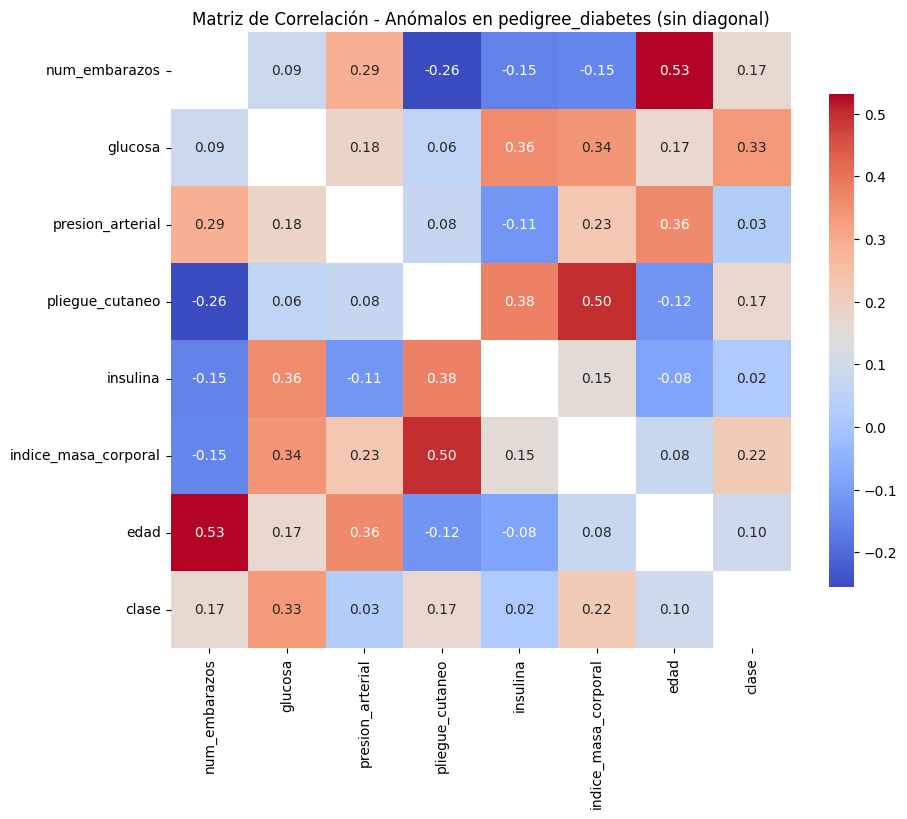

In [18]:
# Calcular la matriz de correlación
correlacion = anomalos[columnas].corr()

# Reemplazar los valores de la diagonal con NaN para que no se muestren en el gráfico
np.fill_diagonal(correlacion.values, np.nan)

# Graficar la matriz de correlación sin aplicar la máscara superior
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación - Anómalos en pedigree_diabetes (sin diagonal)")
plt.show()

Aunque esos valores estén mal, y esas entradas representen algo más del 6% de los datos, no creo que sea necesario eliminar esos registros. En este caso, creo que la mejor opción es intercambiar esos valores por la mediana de esa variable.

In [19]:
# Reemplazar los valores anómalos con la mediana
mediana = data['pedigri_diabetes'].median()
data.loc[data['pedigri_diabetes'] > 1, 'pedigri_diabetes'] = mediana
data[data['pedigri_diabetes'] > 1].shape[0]

0

Finalmente, para terminar con la limpieza de los datos, nos quedan los ceros de las variables `glucosa`y `presion_arterial`. En este caso, sería canviarlos por las medianas, sin contar los ceros, de ambas columnas.

In [20]:
# Reemplazar los valores de 0 con la mediana en las columnas 'glucosa' y 'presion_arterial'
for col in ['glucosa', 'presion_arterial']:
    mediana = data.loc[data[col] != 0, col].median()  # Calcula la mediana sin considerar los ceros
    data[col] = data[col].replace(0, mediana)  # Reemplaza los ceros con la mediana

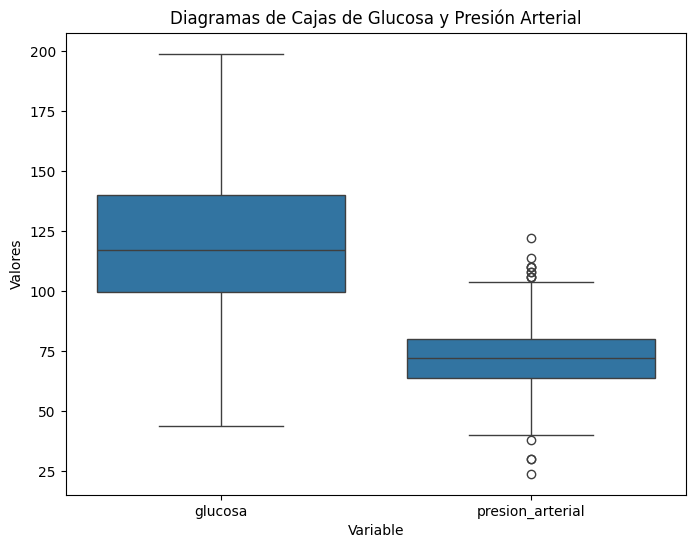

In [21]:
# Crear un dataframe en formato largo para Seaborn
data_long = data[['glucosa', 'presion_arterial']].melt(var_name='Variable', value_name='Valor')

# Crear el boxplot con Seaborn
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
sns.boxplot(x='Variable', y='Valor', data=data_long)

# Configurar el título y etiquetas
plt.title('Diagramas de Cajas de Glucosa y Presión Arterial')
plt.ylabel('Valores')
plt.xlabel('Variable')
plt.show()

# 7. Transformación de los datos

In [70]:
# Separar características (X) y etiquetas (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Dividimos nuestros conjuntos de datos, y para que el experimento vuelva a ser replicable, fijamos la semilla con el random_state a 42.

In [71]:
# Dividir el conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train_tr, X_train_val, y_train_tr, y_train_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [72]:
# Escalado de características
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.transform(X_train_val)
X_test_scaler = scaler.transform(X_test)


# 8. Construcción del modelo

Como queremos construir un **perceptrón simple**, es decir, una red neuronal con solo una capa de entrada y una capa de salida, cada capa tiene una conexión directa con la siguiente, lo que hace que la estructura sea secuencial. Por eso, en este caso usaremos el **modelo secuencial** de **Keras**. 

Por otro lado como nuestro objetivo es predecir una clase binaria (0 o 1), usar una función de activación tipo sigmoide puede ser la más adecuada.

In [73]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))

Debemos tener en cuenta que estamos construyendo un perceptrón simple, por eso nuestra capa densa unicamente tendrá una neurona.

# 9. Compilación del modelo

Preparamos el modelo para el proceso de entrenamiento definiendo los siguientes elementos clave:

- `Optimizador`: Controla cómo se actualizan los pesos del modelo para minimizar el error.
- `Función de pérdida`: Define cómo medir el error entre las predicciones y las etiquetas.
- `Métricas`: Especifica qué métricas adicionales queremos monitorear.


En este caso, como el modelo es muy sencillo vamos a usar el optimizador SGD que es de los más básicos que hay en machine learning

In [74]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# 10. Entrenamiento del modelo

In [79]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaler, y_train, epochs=200, batch_size=64, validation_data=(X_val_scaler, y_train_val), callbacks=[early_stopping])


Epoch 1/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.7704 - val_loss: 0.4572 - val_accuracy: 0.8065
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7704 - val_loss: 0.4571 - val_accuracy: 0.8065
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7704 - val_loss: 0.4571 - val_accuracy: 0.8065
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7704 - val_loss: 0.4571 - val_accuracy: 0.8065
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7704 - val_loss: 0.4571 - val_accuracy: 0.8065
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7704 - val_loss: 0.4571 - val_accuracy: 0.8065
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.7704 - val_loss: 0.4572 - val_accuracy: 0.8065
Epoch 8/200
1

Con una tasa de aprendizaje de 0.01 el modelo no llega al 80% de accuracy ni en training ni en validación

# 11. Evaluación del modelo

In [81]:
test_loss, test_accuracy = model.evaluate(X_test_scaler, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

5/5 [==============================] - 0s 0s/step - loss: 0.5225 - accuracy: 0.7403
Precisión en el conjunto de prueba: 0.7403


# 12. Gráficas de Precisión y Pérdida

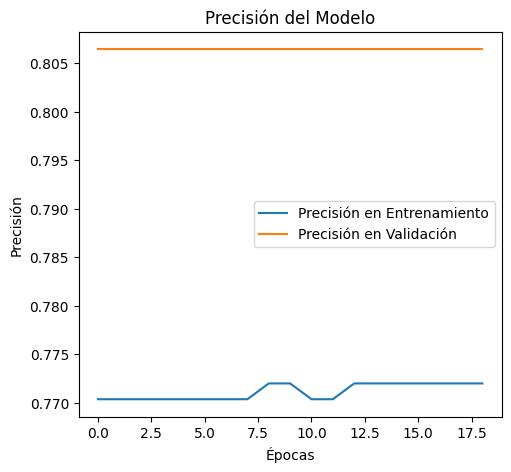

In [82]:
# Graficar la precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

El modelo parece ser consistente en su desempeño y no muestra grandes variaciones entre épocas. Sin embargo, la discrepancia entre la precisión de entrenamiento y validación puede indicar que el modelo captura patrones útiles pero podría no generalizar perfectamente, como se observa en la precisión de prueba más baja (74.03%).

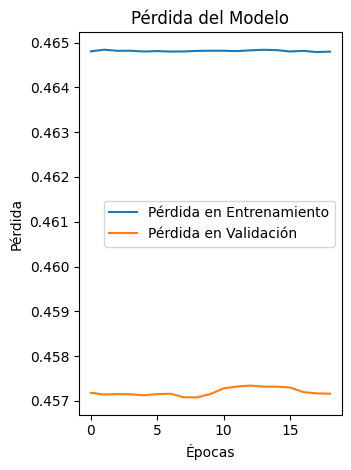

In [83]:
# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

La diferencia entre las pérdidas de entrenamiento y validación es mínima, lo cual indica que el modelo no sufre de un sobreajuste severo. Sin embargo, la pérdida en el conjunto de prueba (0.5225) es mayor, lo que sugiere una ligera caída en el desempeño al enfrentarse a datos nuevos.



# 13. Conclusiones 

El modelo presenta un desempeño razonable en la predicción de diabetes, con una precisión del 80.65% en la validación y 74.03% en la prueba, y métricas estables que reflejan un entrenamiento bien controlado. Sin embargo, la menor precisión en el conjunto de prueba sugiere un posible sobreajuste, y la naturaleza del perceptrón simple limita su capacidad para capturar la complejidad de los datos, especialmente en las relaciones no lineales. Para mejorar la precisión y la capacidad de generalización, sería recomendable explorar arquitecturas más avanzadas y técnicas de optimización.